In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [6]:
df = pd.read_csv('/content/Position_Salaries.csv')

In [7]:
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [8]:
df.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [10]:
df.isnull().sum()

,0
Position,0
Level,0
Salary,0


In [17]:
x = df.iloc[:,1:2].values

In [18]:
y = df.iloc[:,2].values

In [19]:
print(x,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [20]:
label_encoder = LabelEncoder()

In [22]:
x_categorical = df.select_dtypes(include = 'object').apply(label_encoder.fit_transform)

In [23]:
print(x_categorical)

   Position
0         0
1         4
2         8
3         5
4         3
5         7
6         6
7         9
8         1
9         2


In [24]:
x_numerical = df.select_dtypes(exclude='object')

In [25]:
x = pd.concat([x_categorical,x_numerical],axis=1).values

In [26]:
print(x)

[[      0       1   45000]
 [      4       2   50000]
 [      8       3   60000]
 [      5       4   80000]
 [      3       5  110000]
 [      7       6  150000]
 [      6       7  200000]
 [      9       8  300000]
 [      1       9  500000]
 [      2      10 1000000]]


In [27]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0,oob_score=True)

In [29]:
regressor.fit(x,y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
oob_score = regressor.oob_score_
print(f'OOB Score: {oob_score}')

OOB Score: 0.28862044201427817


In [33]:
predictions = regressor.predict(x)

In [34]:
mse = mean_squared_error(y,predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y,predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 4240225000.0
R-squared: 0.9474323490852289


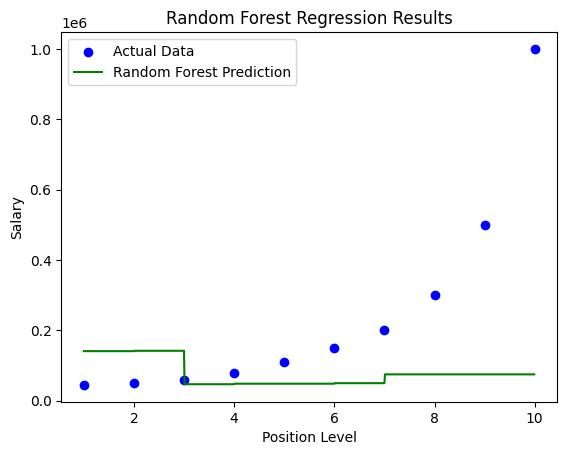

In [35]:
import numpy as np

X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
X_grid = X_grid.reshape(-1, 1)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 2))))

plt.scatter(X[:, 0], y, color='blue', label="Actual Data")
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")
plt.title("Random Forest Regression Results")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

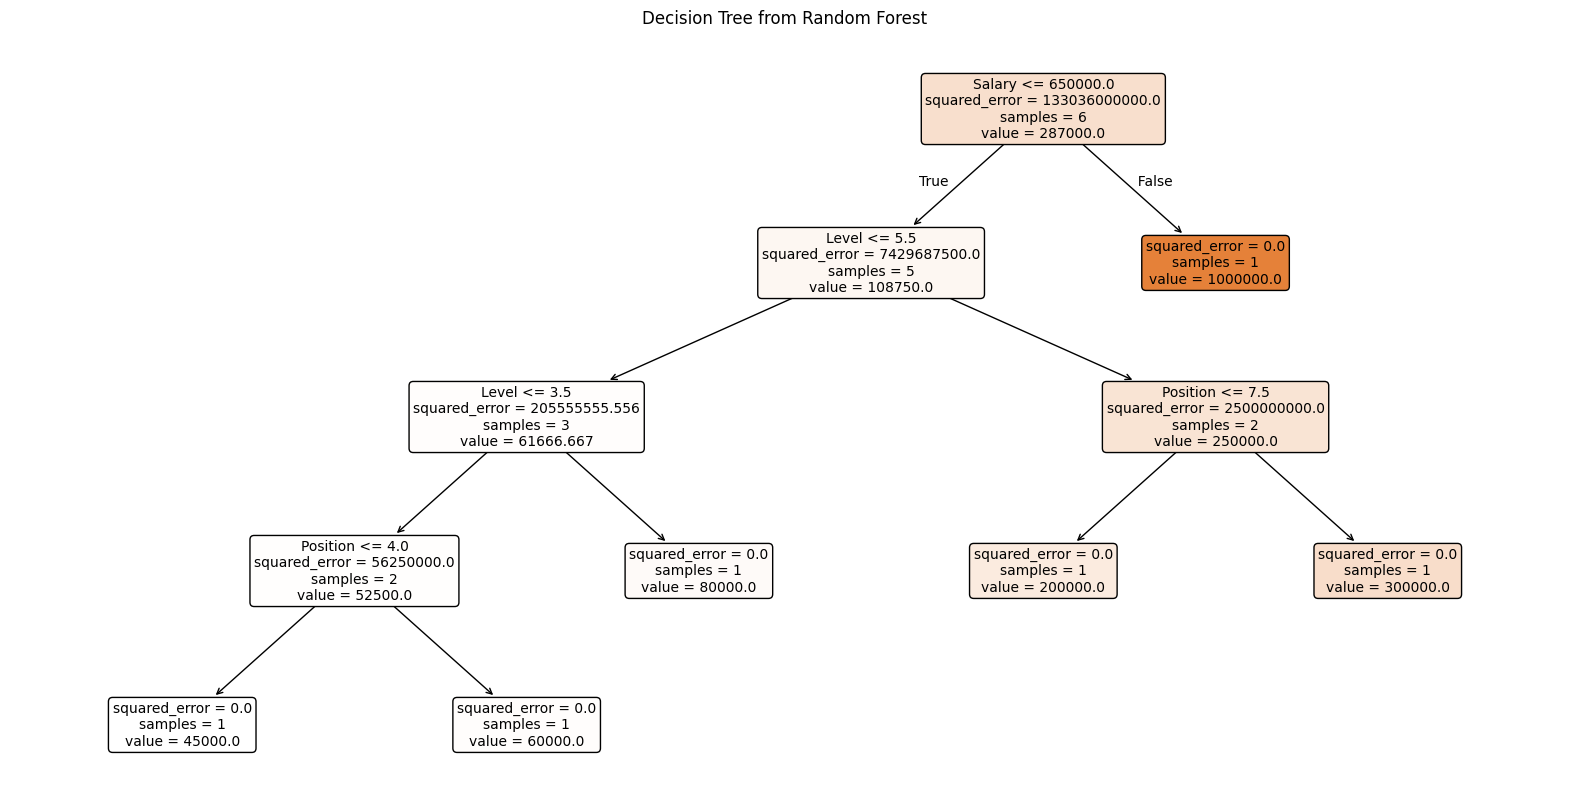

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()